In [2]:
%load_ext autoreload
%autoreload 2


In [1]:
import os
os.chdir("../..")
os.getcwd()


'/Users/yoshikawa/loutrebleu/workspace/qml'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Callable


In [3]:
from qml.tools.wavelet import WaveletTransform, Haar


In [18]:
func = lambda xs_: np.sin(xs_) - 0.6 * np.sin(2 * xs_) + 0.3 * np.cos(4 * xs_)


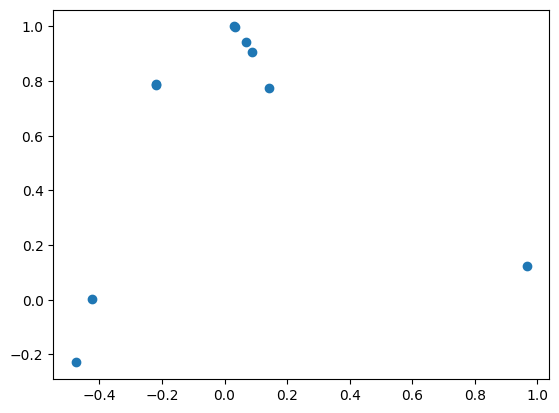

In [66]:
xs = np.random.uniform(-1, 1, 10)
xs = np.sort(xs)
ys = np.sin(xs) - 0.6 * np.sin(2 * xs) + 0.3 * np.cos(4 * xs)
ys /= np.max(np.abs(ys))

plt.scatter(xs, ys)


In [63]:
wavelet = Haar()
wt = WaveletTransform(wavelet)


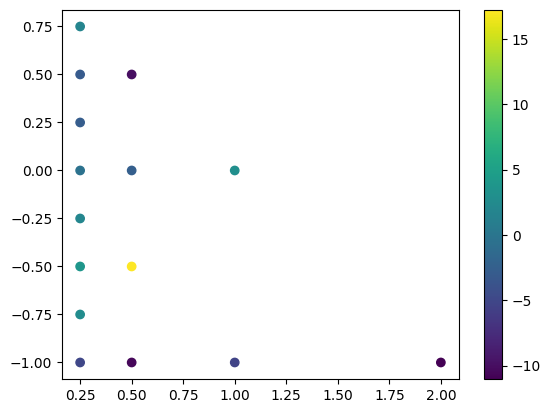

In [64]:
wpowers = wt.transform(xs, ys, dim=4)
wpatterns = wt.generate_wavelet_params(4)
wpattern_xs = wpatterns[:, 0]
wpattern_ys = wpatterns[:, 1]

plt.scatter(wpattern_xs, wpattern_ys, c=wpowers)
plt.colorbar()


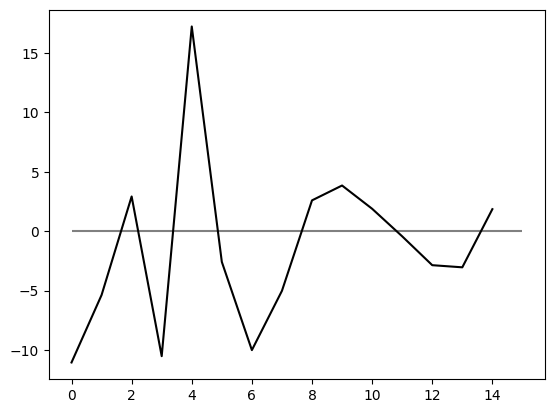

In [65]:
plt.hlines(0, 0, len(wpowers), colors="gray")
plt.plot(wpowers, color="black")


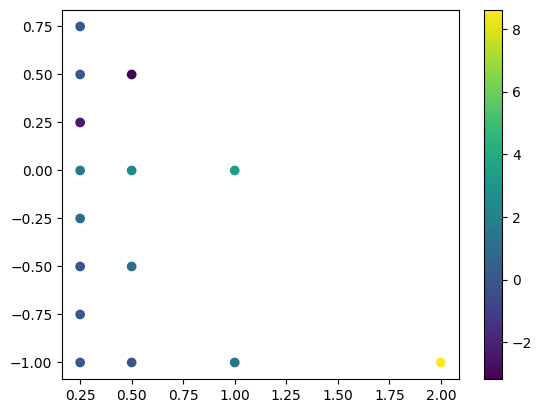

In [67]:
wpowers = wt.transform(xs, ys, dim=4)
wpatterns = wt.generate_wavelet_params(4)
wpattern_xs = wpatterns[:, 0]
wpattern_ys = wpatterns[:, 1]

plt.scatter(wpattern_xs, wpattern_ys, c=wpowers)
plt.colorbar()


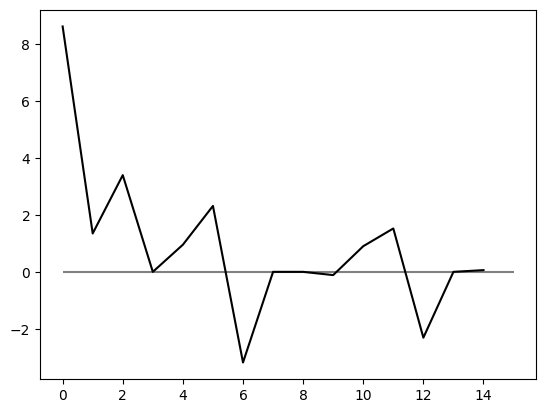

In [68]:
plt.hlines(0, 0, len(wpowers), colors="gray")
plt.plot(wpowers, color="black")


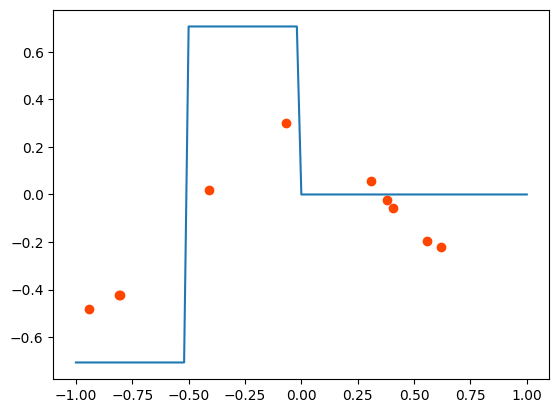

In [61]:
wp_idx = 4
xs = np.random.random(10) * 2 - 1
ys = func(xs)
xps = np.linspace(-1, 1, 101)
wavep = wavelet.get_pattern_applied_func(*wpatterns[wp_idx], xps)
wave = wavelet.get_pattern_applied_func(*wpatterns[wp_idx], xs)

plt.plot(xps, wavep)
plt.scatter(xs, ys, c="orangered")


-0.03003121042148198 -0.3003121042148198


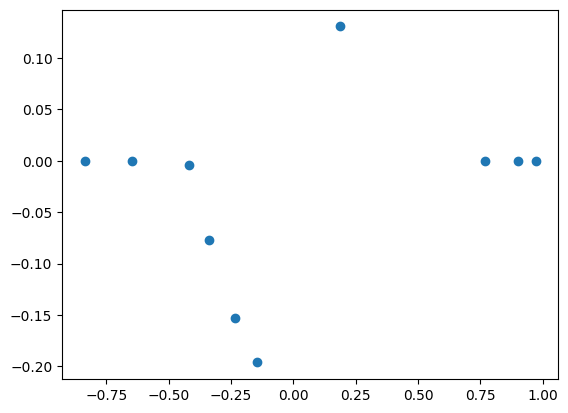

In [56]:
ps = wave * ys
plt.scatter(xs, ps)
print(np.mean(ps), np.sum(ps))


In [41]:
print(np.sum(ps))


-0.13147909453986956


In [21]:
spxs = np.random.random(10) * 2 - 1
spys = func(spxs)


In [23]:
wt.transform(spxs, spys)


array([-0.86429831, -0.62431174,  0.63747228, -0.62256357,  0.80367208,
       -0.00386405, -0.34518302, -0.23333223,  0.02644554,  0.20688669,
        0.12806306,  0.0014753 , -0.13374595, -0.10860792,  0.10688054])

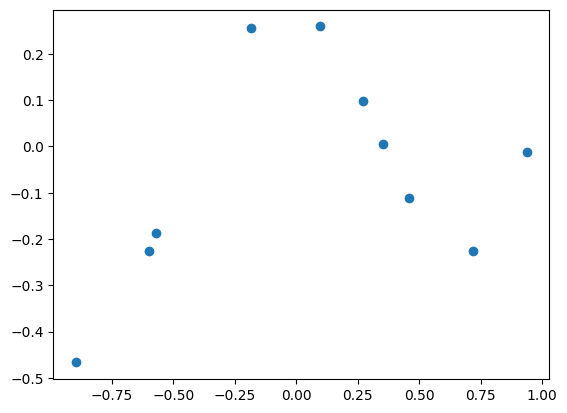

In [22]:
plt.scatter(spxs, spys)
